In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#upload the dataset

In [4]:
data = pd.read_csv('/content/drive/MyDrive/Capstone_Project_2/IMDB Dataset.csv')

#analyzing and understanding dataset

In [5]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [8]:
data.dtypes

review       object
sentiment    object
dtype: object

In [9]:
data.shape

(50000, 2)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [11]:
# create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

In [12]:
# convert the text data into vectors
X = vectorizer.fit_transform(data['review'])

In [13]:
# target variable
y = data['sentiment']

#train the model

In [14]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Logestic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

# create the logistic regression model
lr = LogisticRegression()

In [16]:
# train the model
lr.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# predict the sentiment for the test data
y_pred = lr.predict(X_test)

In [18]:
# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)
# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
# calculate the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Accuracy: 0.9003
F1 Score: 0.9002778633393153
Confusion Matrix:
[[4405  556]
 [ 441 4598]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



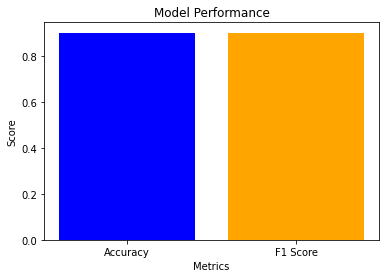

In [19]:
# create a bar plot
plt.bar(['Accuracy', 'F1 Score'], [accuracy, f1], color=['blue', 'orange'])
plt.title('Model Performance')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

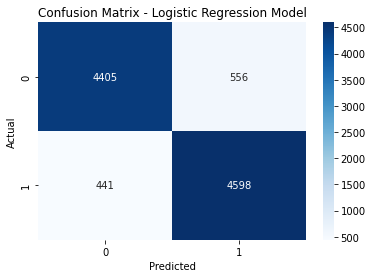

In [20]:
# plot the confusion matrix as a heatmap
import seaborn as sns

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


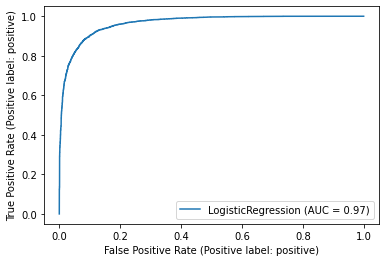

In [21]:
from sklearn.metrics import plot_roc_curve
# plot the ROC curve
plot_roc_curve(lr, X_test, y_test)
plt.show()

In [22]:
import joblib
# save the trained model
joblib.dump(lr, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [23]:
# load the saved model
dt = joblib.load('logistic_regression_model.pkl')


#DECISION TREE

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(y_train)


LabelEncoder()

In [25]:
from sklearn.tree import DecisionTreeClassifier

# create the decision tree model
dt = DecisionTreeClassifier()


In [26]:
# train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
# predict the sentiment for the test data
y_pred = dt.predict(X_test)

In [28]:
# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)
# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
# calculate the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Accuracy: 0.7169
F1 Score: 0.7169010333700684
Confusion Matrix:
[[3548 1413]
 [1418 3621]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.71      0.72      0.71      4961
    positive       0.72      0.72      0.72      5039

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.72     10000
weighted avg       0.72      0.72      0.72     10000



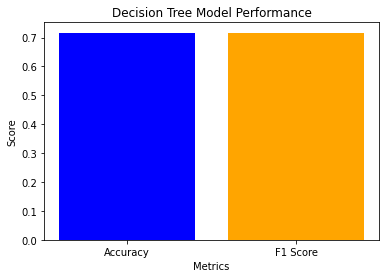

In [29]:
# create a bar plot
plt.bar(['Accuracy', 'F1 Score'], [accuracy, f1], color=['blue', 'orange'])
plt.title('Decision Tree Model Performance')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

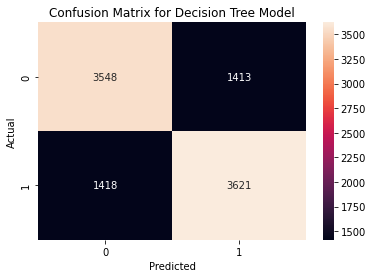

In [30]:
# plot the heatmap
sns.heatmap(cm, annot=True, fmt='d')

# set the axis labels
plt.xlabel('Predicted')
plt.ylabel('Actual')

# set the title
plt.title('Confusion Matrix for Decision Tree Model')

# show the plot
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


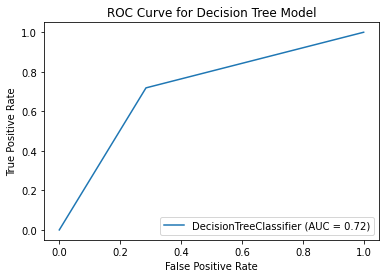

In [31]:
from sklearn.metrics import plot_roc_curve

# plot the ROC curve for the decision tree model
plot_roc_curve(dt, X_test, y_test)

# set the title and axis labels
plt.title('ROC Curve for Decision Tree Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the plot
plt.show()


In [32]:
# save the trained model
import joblib

# save the trained model
joblib.dump(dt, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [33]:
# load the saved model
dt = joblib.load('decision_tree_model.pkl')

#Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

# create the random forest model
rf = RandomForestClassifier()

In [35]:
# train the model
rf.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# predict the sentiment for the test data
y_pred = rf.predict(X_test)

In [37]:
# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)
# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
# calculate the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Accuracy: 0.8481
F1 Score: 0.8481009432997642
Confusion Matrix:
[[4236  725]
 [ 794 4245]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.85      0.85      4961
    positive       0.85      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


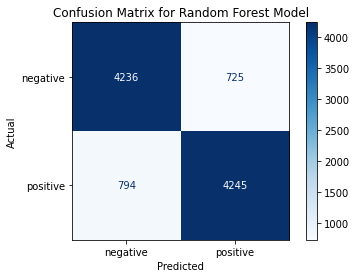

In [38]:
from sklearn.metrics import plot_confusion_matrix

# plot confusion matrix for random forest model
plot_confusion_matrix(rf, X_test, y_test, cmap=plt.cm.Blues)

# set the title and axis labels
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# show the plot
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


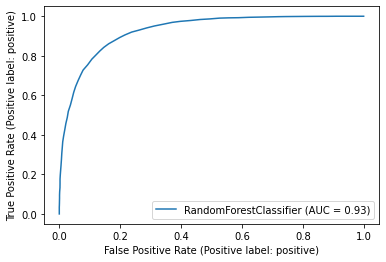

In [39]:
from sklearn.metrics import plot_roc_curve

# plot the ROC curve
plot_roc_curve(rf, X_test, y_test)
plt.show()

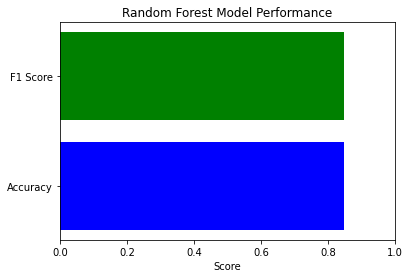

In [40]:
# plot the bar chart
plt.barh(['Accuracy', 'F1 Score'], [accuracy, f1], color=['blue', 'green'])

# set the title and axis labels
plt.title('Random Forest Model Performance')
plt.xlabel('Score')
plt.xlim(0, 1)

# show the plot
plt.show()

In [41]:
import joblib

# Save the trained model as a pickle file
joblib.dump(rf, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [42]:
# Load the saved model
rf_loaded = joblib.load('random_forest_model.pkl')


#Multinomial Naïve Bayes

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve

In [44]:
# create the MNB model
mnb = MultinomialNB()

In [45]:
# train the model
mnb.fit(X_train, y_train)

MultinomialNB()

In [46]:
# predict the sentiment for the test data
y_pred = mnb.predict(X_test)

In [47]:
# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)
# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
# calculate the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Accuracy: 0.8638
F1 Score: 0.8637379167135314
Confusion Matrix:
[[4408  553]
 [ 809 4230]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.84      0.89      0.87      4961
    positive       0.88      0.84      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


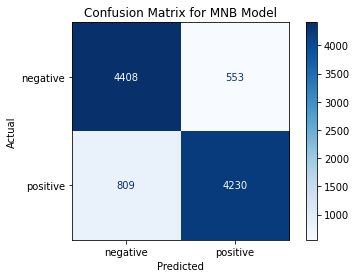

In [48]:
# plot confusion matrix for MNB model
plot_confusion_matrix(mnb, X_test, y_test, cmap=plt.cm.Blues)

# set the title and axis labels
plt.title('Confusion Matrix for MNB Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# show the plot
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


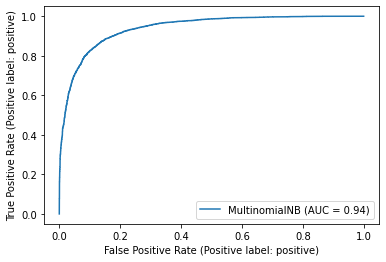

In [49]:
# plot the ROC curve
plot_roc_curve(mnb, X_test, y_test)
plt.show()

In [50]:
import joblib
# save the trained model
joblib.dump(mnb, 'multinomial_mnb_model.pkl')

['multinomial_mnb_model.pkl']

In [51]:
# Load the saved model
rf_loaded = joblib.load('multinomial_mnb_model.pkl')

#K-Nearest Neighbor

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve

In [53]:
# create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

In [54]:
# train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [55]:
# predict the sentiment for the test data
y_pred = knn.predict(X_test)

In [59]:
# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate the f1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)
# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
# calculate the classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Accuracy: 0.768
F1 Score: 0.7675716169017359
Confusion Matrix:
[[3605 1356]
 [ 964 4075]]
Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.73      0.76      4961
    positive       0.75      0.81      0.78      5039

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


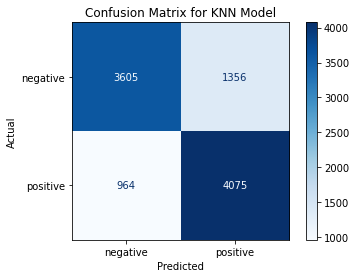

In [60]:
# plot confusion matrix for KNN model
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)

# set the title and axis labels
plt.title('Confusion Matrix for KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# show the plot
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


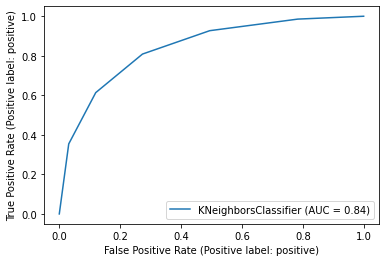

In [61]:
# plot the ROC curve
plot_roc_curve(knn, X_test, y_test)
plt.show()

In [62]:
# save the trained model
import joblib
joblib.dump(knn, "knn_model.pkl")

['knn_model.pkl']

In [63]:
# Load the saved model
rf_loaded = joblib.load('knn_model.pkl')

#SVM

In [75]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, classification_report
import matplotlib.pyplot as plt
import numpy as np


In [76]:
from sklearn.metrics import roc_auc_score


In [77]:
# load the digits dataset
digits = load_digits()

In [78]:
# get the data and target values
X, y = digits.data, digits.target


In [79]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
# create the SVM model
svm = SVC(kernel='linear', C=1)

In [81]:
# train the model
svm.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [82]:
# predict the test set
y_pred = svm.predict(X_test)


In [83]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9777777777777777
F1 Score: 0.9776863807154582
Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  1  0  0  1  0 37]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


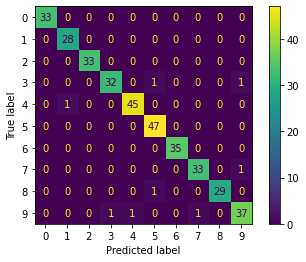

In [84]:
# plot the confusion matrix
plot_confusion_matrix(svm, X_test, y_test)
plt.show()

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np

In [95]:
# Define the six models
models = [LogisticRegression(), 
          DecisionTreeClassifier(), 
          RandomForestClassifier(), 
          MultinomialNB(), 
          KNeighborsClassifier(),
          SVC()]

In [96]:
# Define the evaluation metric (F1-score)
metric = 'f1_macro'

In [97]:
# Perform cross-validation and calculate the mean and standard deviation of the metric for each model
cv_scores = []
for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring=metric)
    cv_scores.append(scores.mean())
    print(f"{str(model)} {metric} mean: {scores.mean()}, std: {scores.std()}")

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

LogisticRegression() f1_macro mean: 0.9138418176269939, std: 0.026869741834797536
DecisionTreeClassifier() f1_macro mean: 0.7769996657229533, std: 0.04548340022452675
RandomForestClassifier() f1_macro mean: 0.9360303129584032, std: 0.02128367477749303
MultinomialNB() f1_macro mean: 0.8700425108567744, std: 0.04011728500746525
KNeighborsClassifier() f1_macro mean: 0.9626496370410162, std: 0.011065097059087417
SVC() f1_macro mean: 0.9630401013994254, std: 0.020160900215514907


In [98]:
# Find the index of the model with the highest mean score
best_model_idx = np.argmax(cv_scores)

In [99]:
# Print the name of the best model
print(f"The best model is {str(models[best_model_idx])} with {metric} score of {cv_scores[best_model_idx]}")

The best model is SVC() with f1_macro score of 0.9630401013994254
